Using a time series model(ARIMA) to analyze and predict youth unemployment in China for 30 years


In [1]:
# import some basic package
import pandas as pd
import datetime
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Generate corresponding data on China's unemployment rate from 1991 to 2019

In [2]:
#import data
unerate=pd.array([4.44,4.51,5.16,5.63,5.92,6.22,6.52,6.61,6.89,6.95,8.04,8.91,9.76,9.55,9.56,9.36,9.17,9.84,10.11,9.78,9.89,10.27,10.44,10.61,10.76,10.65,10.50,10.59,10.65])
index=pd.date_range('1991',periods=29,freq='YS')
une_train=pd.Series(unerate,index)
print(une_train)

1991-01-01     4.44
1992-01-01     4.51
1993-01-01     5.16
1994-01-01     5.63
1995-01-01     5.92
1996-01-01     6.22
1997-01-01     6.52
1998-01-01     6.61
1999-01-01     6.89
2000-01-01     6.95
2001-01-01     8.04
2002-01-01     8.91
2003-01-01     9.76
2004-01-01     9.55
2005-01-01     9.56
2006-01-01     9.36
2007-01-01     9.17
2008-01-01     9.84
2009-01-01    10.11
2010-01-01     9.78
2011-01-01     9.89
2012-01-01    10.27
2013-01-01    10.44
2014-01-01    10.61
2015-01-01    10.76
2016-01-01    10.65
2017-01-01    10.50
2018-01-01    10.59
2019-01-01    10.65
Freq: AS-JAN, dtype: float64


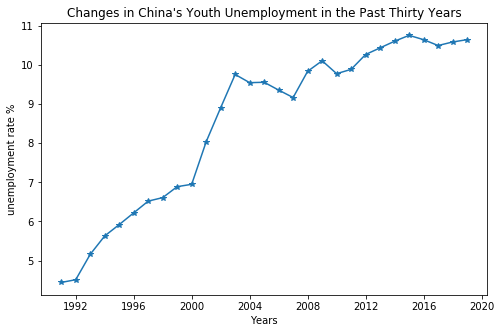

In [8]:
#data visualization
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(8,5))
plt.plot(index,une_train,marker='*')
plt.xlabel('Years')
plt.ylabel('unemployment rate %')
plt.title("Changes in China's Youth Unemployment in the Past Thirty Years")
plt.show()

First-order difference

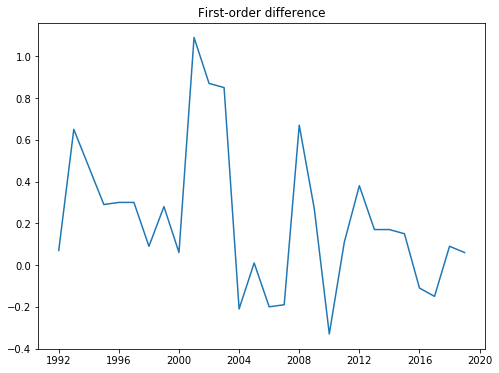

In [9]:
#First-order difference
une_diff = une_train.diff()
une_diff = une_diff.dropna()
#data visualization
plt.figure(figsize=(8,6))
plt.plot(une_diff)
plt.title('First-order difference')
plt.show()

Second-order difference

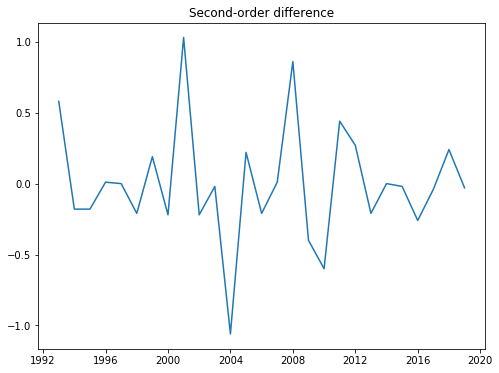

In [10]:
#Second-order difference
une_diff2 = une_diff.diff()
une_diff2 = une_diff2.dropna()
#data visualization
plt.figure(figsize=(8,6))
plt.plot(une_diff2)
plt.title('Second-order difference')
plt.show()

Acf indicator calculation

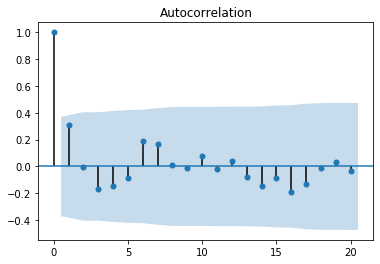

In [16]:
#Acf indicator calculation
acf = plot_acf(une_diff,lags=20)

Pacf indicator calculation

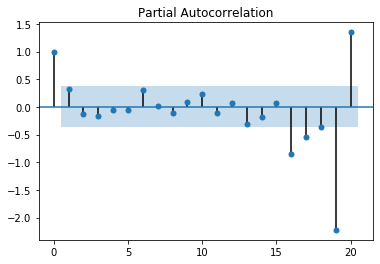

In [15]:
#pacf indicator calculation 
pacf = plot_pacf(une_diff,lags=20)

Train ARIMA model


In [18]:
#Using ARIMA Model to train the data 
model = ARIMA(une_train,order=(0,1,0),freq='YS')
model_fit = model.fit()

In [19]:
#prediction results  
pred=model_fit.predict(start=1,end=40,dynamic=False,typ='levels')
print(pred)

1992-01-01     4.661786
1993-01-01     4.731786
1994-01-01     5.381786
1995-01-01     5.851786
1996-01-01     6.141786
1997-01-01     6.441786
1998-01-01     6.741786
1999-01-01     6.831786
2000-01-01     7.111786
2001-01-01     7.171786
2002-01-01     8.261786
2003-01-01     9.131786
2004-01-01     9.981786
2005-01-01     9.771786
2006-01-01     9.781786
2007-01-01     9.581786
2008-01-01     9.391786
2009-01-01    10.061786
2010-01-01    10.331786
2011-01-01    10.001786
2012-01-01    10.111786
2013-01-01    10.491786
2014-01-01    10.661786
2015-01-01    10.831786
2016-01-01    10.981786
2017-01-01    10.871786
2018-01-01    10.721786
2019-01-01    10.811786
2020-01-01    10.871786
2021-01-01    11.093571
2022-01-01    11.315357
2023-01-01    11.537143
2024-01-01    11.758929
2025-01-01    11.980714
2026-01-01    12.202500
2027-01-01    12.424286
2028-01-01    12.646071
2029-01-01    12.867857
2030-01-01    13.089643
2031-01-01    13.311429
Freq: AS-JAN, dtype: float64


Text(0.5, 1.0, "Prediction Changes in China's Youth Unemployment ")

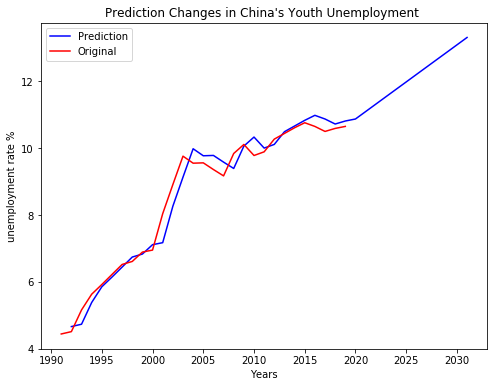

In [20]:
#data visualization
plt.figure(figsize=(8,6))
plt.plot(pred,label='Prediction',color='blue')
plt.plot(une_train,label='Original',color='red')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('unemployment rate %')
plt.title("Prediction Changes in China's Youth Unemployment ")